# Exemples avec Jupyter Notebook et Pandas



## Exercices sur les statistiques de l'élevage bovin en Suisse et son évoluton historique

Auteur : **Pablo Iriarte, UNIGE - pablo.iriarte@unige.ch**  
Date : 10.03.2020

Ce notebook est aussi une vérification des statistiques publiées dans le livre "Bewes, Diccon. Swisscellany Facts & Figures About Switzerland. Basel: Bergli, 2012" et cité dans le blog : https://www.newlyswissed.com/counting-the-cows-of-switzerland/

Sources des données sur l'élevage en Suisse de bovins par canton :
* OFS (1985-2018) chiffres totales pour la Suisse : https://www.bfs.admin.ch/bfs/fr/home/statistiques/catalogues-banques-donnees/cartes.assetdetail.8346706.html
* OFS (2000-2018) chiffres par canton avec détail sur les vaches un onglet par année : https://www.bfs.admin.ch/bfs/fr/home/statistiques/agriculture-sylviculture/agriculture/structures.assetdetail.8346720.html
* OFS (1975-2018 pour le total de bovins) : https://www.bfs.admin.ch/bfs/fr/home/statistiques/agriculture-sylviculture/agriculture/structures.assetdetail.8346720.html
* HSSO (1866-1993) bovins et détails sur les vaches : https://hsso.ch/fr/2012/i/9
* DHS : https://hls-dhs-dss.ch/fr/articles/013944/2007-11-29/

Sources des données sur la population CH :
* OFS (1991-2018) : https://www.bfs.admin.ch/bfs/fr/home/statistiques/population/effectif-evolution/repartition-territoriale.assetdetail.9486040.html
* HSSO (1671-1990) : https://hsso.ch/fr/2012/b/1a

Sources des données sur la surface des cantons :
* OFS (2019) : https://www.bfs.admin.ch/bfs/fr/home/statistiques/statistique-regions/portraits-regionaux-chiffres-cles/cantons.assetdetail.7786545.html

## Exercices

### 1. Importer les données de l'OFS exportés en csv  
  (fichier px-x-0702000000_101.csv disponible sur le dossier data_shared)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Données OFS exportés à partir de la page https://www.pxweb.bfs.admin.ch/pxweb/fr/px-x-0702000000_101/px-x-0702000000_101/px-x-0702000000_101.px
# Statistique "Emplois, exploitations agricoles, surface agricole utile (SAU) et animaux de rente selon le niveau de classification 1 par canton" Information
# Unité : Exploitation, emploi, ha, animal 
# Contact : Section Structure et analyses économiques, 058 463 62 66, e-mail: agrar@bfs.admin.ch 
# Dernière mise à jour : 28.05.2019 
# Enquête : Relevé des structures agricoles (STRU) 
# Matrice : px-x-0702000000_101 
# Base de données : OFS - STAT-TAB / Office fédéral de la statistique, 2010 Neuchâtel / Suisse / © Office fédéral de la statistique 
url_elevage_ofs_ch = ('https://www.bfs.admin.ch/bfsstatic/dam/assets/8346706/master')
url_elevage_ofs = ('https://www.bfs.admin.ch/bfsstatic/dam/assets/8346717/master')
fichier_elevage_ofs_bovins = ('shared_data/vaches/px-x-0702000000_101.csv')
url_elevage_hsso = ('https://hsso.ch/get/I.09.xlsx')
url_population_ofs = ('https://www.bfs.admin.ch/bfsstatic/dam/assets/9486040/master')
url_population_hsso = ('https://hsso.ch/get/B.01a.xlsx')
url_surface_cantons_ofs = ('https://www.bfs.admin.ch/bfsstatic/dam/assets/7786545/master')

In [3]:
# fichier OFS pour les bovins : 2 lignes en trop en haut
df_elevage_ofs_bovins = pd.read_csv(fichier_elevage_ofs_bovins, sep='\t', header=0, encoding='ANSI', skiprows=2)
df_elevage_ofs_bovins

,Unité d'observation,Canton,1975,1980,1985,1990,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Cheptel - Bovins,Suisse,1845911,1903725,1848431,1858187,1747071,1672930,1640871,1608735,...,1597484,1591233,1577407,1564631,1557474,1562801,1554319,1555396,1544612,1543345
1,Cheptel - Bovins,Zürich,135307,138049,131170,123235,111798,106479,102454,98653,...,94714,95020,94598,94084,93233,95819,95114,95774,94916,93564
2,Cheptel - Bovins,Bern / Berne,349513,360129,354036,370096,345438,332142,329473,323489,...,323983,320581,317891,317048,312010,315887,308609,308843,307258,305301
3,Cheptel - Bovins,Luzern,164530,170364,170251,168279,155268,148964,144970,142710,...,150343,151076,151013,149789,149606,149205,147690,150012,149277,148319
4,Cheptel - Bovins,Uri,13559,13595,13764,15382,14572,13666,13691,13699,...,12193,12111,11685,11619,11394,11316,11911,11882,11805,11608
5,Cheptel - Bovins,Schwyz,51804,52543,53768,54231,51237,48488,47879,46970,...,44832,44669,43921,43889,43492,43325,43178,43373,42764,43380
6,Cheptel - Bovins,Obwalden,20341,19922,20772,21769,20641,19244,18943,18791,...,18088,18070,17282,17725,17614,17738,18047,18092,18244,18362
7,Cheptel - Bovins,Nidwalden,13992,13876,14591,14743,14256,13642,13528,13347,...,12469,12472,12160,12053,12120,11934,12075,11850,11987,12131
8,Cheptel - Bovins,Glarus,14668,14651,14539,14780,13732,13067,12771,12771,...,12022,11797,11694,11583,11388,11292,11591,11900,11866,11769
9,Cheptel - Bovins,Zug,22856,23870,24488,24348,21935,21041,20707,20321,...,20430,20197,20404,20327,27705,20486,20363,20498,20351,20794


In [4]:
# supprimer la première colonne qui n'es pas utile
df_elevage_ofs_bovins = df_elevage_ofs_bovins.iloc[:,1:]
df_elevage_ofs_bovins

,Canton,1975,1980,1985,1990,1996,1997,1998,1999,2000,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Suisse,1845911,1903725,1848431,1858187,1747071,1672930,1640871,1608735,1588005,...,1597484,1591233,1577407,1564631,1557474,1562801,1554319,1555396,1544612,1543345
1,Zürich,135307,138049,131170,123235,111798,106479,102454,98653,97312,...,94714,95020,94598,94084,93233,95819,95114,95774,94916,93564
2,Bern / Berne,349513,360129,354036,370096,345438,332142,329473,323489,316160,...,323983,320581,317891,317048,312010,315887,308609,308843,307258,305301
3,Luzern,164530,170364,170251,168279,155268,148964,144970,142710,141894,...,150343,151076,151013,149789,149606,149205,147690,150012,149277,148319
4,Uri,13559,13595,13764,15382,14572,13666,13691,13699,13293,...,12193,12111,11685,11619,11394,11316,11911,11882,11805,11608
5,Schwyz,51804,52543,53768,54231,51237,48488,47879,46970,46329,...,44832,44669,43921,43889,43492,43325,43178,43373,42764,43380
6,Obwalden,20341,19922,20772,21769,20641,19244,18943,18791,18561,...,18088,18070,17282,17725,17614,17738,18047,18092,18244,18362
7,Nidwalden,13992,13876,14591,14743,14256,13642,13528,13347,12940,...,12469,12472,12160,12053,12120,11934,12075,11850,11987,12131
8,Glarus,14668,14651,14539,14780,13732,13067,12771,12771,12375,...,12022,11797,11694,11583,11388,11292,11591,11900,11866,11769
9,Zug,22856,23870,24488,24348,21935,21041,20707,20321,20237,...,20430,20197,20404,20327,27705,20486,20363,20498,20351,20794


In [5]:
# indexer par Canton et transposer
df_elevage_ofs_bovins = df_elevage_ofs_bovins.set_index('Canton')
df_elevage_ofs_bovins = df_elevage_ofs_bovins.transpose()
df_elevage_ofs_bovins

Canton,Suisse,Zürich,Bern / Berne,Luzern,Uri,Schwyz,Obwalden,Nidwalden,Glarus,Zug,...,St. Gallen,Graubünden / Grigioni / Grischun,Aargau,Thurgau,Ticino,Vaud,Valais / Wallis,Neuchâtel,Genève,Jura
1975,1845911,135307,349513,164530,13559,51804,20341,13992,14668,22856,...,154952,79435,116913,104401,13279,169261,31608,40478,5215,51605
1980,1903725,138049,360129,170364,13595,52543,19922,13876,14651,23870,...,159671,80966,123857,105964,12329,168870,32523,41668,4830,56878
1985,1848431,131170,354036,170251,13764,53768,20772,14591,14539,24488,...,159925,76717,117668,98708,11584,152355,30568,40873,3752,56760
1990,1858187,123235,370096,168279,15382,54231,21769,14743,14780,24348,...,161485,88602,111527,94445,11730,145384,34448,42700,3062,59005
1996,1747071,111798,345438,155268,14572,51237,20641,14256,13732,21935,...,155999,82924,104825,85374,11867,133407,34383,41893,3425,58997
1997,1672930,106479,332142,148964,13666,48488,19244,13642,13067,21041,...,147442,79129,98911,80889,11646,129174,33417,41273,3196,56345
1998,1640871,102454,329473,144970,13691,47879,18943,13528,12771,20707,...,144312,77548,95829,78778,11361,126332,32431,41110,2885,55231
1999,1608735,98653,323489,142710,13699,46970,18791,13347,12771,20321,...,143626,77145,93038,75876,11190,122381,30880,40725,2873,56033
2000,1588005,97312,316160,141894,13293,46329,18561,12940,12375,20237,...,141836,76418,93047,75045,10988,119226,30636,39958,2660,55779
2001,1611351,97531,322256,144903,13139,46326,18723,12921,12283,20253,...,142624,76914,93597,75509,10963,121669,31092,40953,2744,57676


In [6]:
# modifier le type de l'année et renommer l'index
df_elevage_ofs_bovins = df_elevage_ofs_bovins.reset_index()
df_elevage_ofs_bovins['Year'] = df_elevage_ofs_bovins['index'].astype(int)
del df_elevage_ofs_bovins['index']
df_elevage_ofs_bovins = df_elevage_ofs_bovins.set_index('Year')
df_elevage_ofs_bovins

Canton,Suisse,Zürich,Bern / Berne,Luzern,Uri,Schwyz,Obwalden,Nidwalden,Glarus,Zug,...,St. Gallen,Graubünden / Grigioni / Grischun,Aargau,Thurgau,Ticino,Vaud,Valais / Wallis,Neuchâtel,Genève,Jura
Year,,,,,,,,,,,,,,,,,,,,,
1975,1845911,135307,349513,164530,13559,51804,20341,13992,14668,22856,...,154952,79435,116913,104401,13279,169261,31608,40478,5215,51605
1980,1903725,138049,360129,170364,13595,52543,19922,13876,14651,23870,...,159671,80966,123857,105964,12329,168870,32523,41668,4830,56878
1985,1848431,131170,354036,170251,13764,53768,20772,14591,14539,24488,...,159925,76717,117668,98708,11584,152355,30568,40873,3752,56760
1990,1858187,123235,370096,168279,15382,54231,21769,14743,14780,24348,...,161485,88602,111527,94445,11730,145384,34448,42700,3062,59005
1996,1747071,111798,345438,155268,14572,51237,20641,14256,13732,21935,...,155999,82924,104825,85374,11867,133407,34383,41893,3425,58997
1997,1672930,106479,332142,148964,13666,48488,19244,13642,13067,21041,...,147442,79129,98911,80889,11646,129174,33417,41273,3196,56345
1998,1640871,102454,329473,144970,13691,47879,18943,13528,12771,20707,...,144312,77548,95829,78778,11361,126332,32431,41110,2885,55231
1999,1608735,98653,323489,142710,13699,46970,18791,13347,12771,20321,...,143626,77145,93038,75876,11190,122381,30880,40725,2873,56033
2000,1588005,97312,316160,141894,13293,46329,18561,12940,12375,20237,...,141836,76418,93047,75045,10988,119226,30636,39958,2660,55779


### 2. Renommer les cantons  
Aide :  
    'Suisse' : 'CH', 'Zürich' : 'ZH', 'Bern / Berne' : 'BE',
    'Luzern' : 'LU', 'Uri' : 'UR', 'Schwyz' : 'SZ',
    'Obwalden' : 'OW', 'Nidwalden' : 'NW', 'Glarus' : 'GL',
    'Zug' : 'ZG', 'Fribourg / Freiburg' : 'FR', 'Solothurn' : 'SO',
    'Basel-Stadt' : 'BS', 'Basel-Landschaft' : 'BL',
    'Schaffhausen' : 'SH', 'Appenzell Ausserrhoden' : 'AR',
    'Appenzell Innerrhoden' : 'AI', 'St. Gallen' : 'SG',
    'Graubünden / Grigioni / Grischun' : 'GR',
    'Aargau' : 'AG', 'Thurgau' : 'TG',
    'Ticino' : 'TI', 'Vaud' : 'VD', 'Valais / Wallis' : 'VS',
    'Neuchâtel' : 'NE', 'Genève' : 'GE', 'Jura' : 'JU'

In [7]:
# Renommer les cantons
df_elevage_ofs_bovins = df_elevage_ofs_bovins.rename(columns={'Suisse' : 'CH', 'Zürich' : 'ZH', 'Bern / Berne' : 'BE',
                                                              'Luzern' : 'LU', 'Uri' : 'UR', 'Schwyz' : 'SZ',
                                                              'Obwalden' : 'OW', 'Nidwalden' : 'NW', 'Glarus' : 'GL',
                                                              'Zug' : 'ZG', 'Fribourg / Freiburg' : 'FR', 'Solothurn' : 'SO',
                                                              'Basel-Stadt' : 'BS', 'Basel-Landschaft' : 'BL',
                                                              'Schaffhausen' : 'SH', 'Appenzell Ausserrhoden' : 'AR',
                                                              'Appenzell Innerrhoden' : 'AI', 'St. Gallen' : 'SG',
                                                              'Graubünden / Grigioni / Grischun' : 'GR',
                                                              'Aargau' : 'AG', 'Thurgau' : 'TG',
                                                              'Ticino' : 'TI', 'Vaud' : 'VD', 'Valais / Wallis' : 'VS',
                                                              'Neuchâtel' : 'NE', 'Genève' : 'GE', 'Jura' : 'JU'})
df_elevage_ofs_bovins

Canton,CH,ZH,BE,LU,UR,SZ,OW,NW,GL,ZG,...,SG,GR,AG,TG,TI,VD,VS,NE,GE,JU
Year,,,,,,,,,,,,,,,,,,,,,
1975,1845911,135307,349513,164530,13559,51804,20341,13992,14668,22856,...,154952,79435,116913,104401,13279,169261,31608,40478,5215,51605
1980,1903725,138049,360129,170364,13595,52543,19922,13876,14651,23870,...,159671,80966,123857,105964,12329,168870,32523,41668,4830,56878
1985,1848431,131170,354036,170251,13764,53768,20772,14591,14539,24488,...,159925,76717,117668,98708,11584,152355,30568,40873,3752,56760
1990,1858187,123235,370096,168279,15382,54231,21769,14743,14780,24348,...,161485,88602,111527,94445,11730,145384,34448,42700,3062,59005
1996,1747071,111798,345438,155268,14572,51237,20641,14256,13732,21935,...,155999,82924,104825,85374,11867,133407,34383,41893,3425,58997
1997,1672930,106479,332142,148964,13666,48488,19244,13642,13067,21041,...,147442,79129,98911,80889,11646,129174,33417,41273,3196,56345
1998,1640871,102454,329473,144970,13691,47879,18943,13528,12771,20707,...,144312,77548,95829,78778,11361,126332,32431,41110,2885,55231
1999,1608735,98653,323489,142710,13699,46970,18791,13347,12771,20321,...,143626,77145,93038,75876,11190,122381,30880,40725,2873,56033
2000,1588005,97312,316160,141894,13293,46329,18561,12940,12375,20237,...,141836,76418,93047,75045,10988,119226,30636,39958,2660,55779


### 3. Importer les données historiques HSSO

In [8]:
# fichier HSSO pour les bovins : 35 lignes en trop en haut
df_elevage_hsso_bovins = pd.read_excel(url_elevage_hsso, skiprows=6, nrows=25)
# fichier HSSO pour les vaches : 6 lignes en trop en haut
df_elevage_hsso_vaches = pd.read_excel(url_elevage_hsso, skiprows=35, nrows=25)
df_elevage_hsso_bovins

,Jahr,ZH,"BE, JU",BE,LU,UR,SZ,OW,NW,GL,...,AG,TG,TI,VD,VS,NE,GE,JU,CH,Année
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1866.0,70199.0,195327.0,NaN,65349.0,11107.0,23473.0,8988.0,6026.0,9208.0,...,62938.0,34719.0,45020.0,77646.0,62617.0,19109.0,7954.0,NaN,982133.0,1866.0
2,1876.0,74627.0,216702.0,NaN,70739.0,9220.0,25922.0,9024.0,6258.0,9606.0,...,62295.0,35603.0,44188.0,77243.0,65024.0,19469.0,6949.0,NaN,1035856.0,1876.0
3,1886.0,88637.0,258153.0,NaN,85807.0,12193.0,30661.0,10358.0,7468.0,11307.0,...,74642.0,47332.0,50475.0,91141.0,70089.0,22230.0,7187.0,NaN,1212538.0,1886.0
4,1896.0,102292.0,276409.0,NaN,97742.0,12042.0,32277.0,11161.0,8036.0,10906.0,...,82034.0,56991.0,42944.0,99056.0,65654.0,23960.0,8121.0,NaN,1306696.0,1896.0
5,1901.0,100602.0,293862.0,NaN,106603.0,12064.0,32586.0,11855.0,8383.0,11501.0,...,82268.0,52701.0,42668.0,96975.0,71659.0,22723.0,8106.0,NaN,1340375.0,1901.0
6,1906.0,112256.0,327427.0,NaN,114487.0,13119.0,36288.0,14233.0,9466.0,12309.0,...,94454.0,63469.0,43654.0,115576.0,75562.0,26438.0,9091.0,NaN,1498144.0,1906.0
7,1911.0,111034.0,316868.0,NaN,113034.0,12089.0,34208.0,13053.0,8616.0,11363.0,...,93354.0,67267.0,41800.0,108210.0,68481.0,25782.0,8378.0,NaN,1443483.0,1911.0
8,1916.0,122574.0,353095.0,NaN,122088.0,12940.0,37506.0,14763.0,9822.0,12819.0,...,101943.0,77056.0,41997.0,130801.0,80273.0,29434.0,9631.0,NaN,1615893.0,1916.0
9,1918.0,116146.0,332804.0,NaN,117060.0,12925.0,36812.0,14554.0,9690.0,12379.0,...,96971.0,69989.0,40200.0,120684.0,76501.0,27510.0,7893.0,NaN,1530522.0,1918.0


In [9]:
df_elevage_hsso_vaches

,Jahr,ZH,"BE, JU",BE,LU,UR,SZ,OW,NW,GL,...,AG,TG,TI,VD,VS,NE,GE,JU,CH,Année
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1866.0,42983.0,111657.0,NaN,35282.0,5969.0,11135.0,5297.0,3893.0,6014.0,...,34787.0,20735.0,20394.0,44821.0,35719.0,11589.0,6245.0,NaN,552427.0,1866.0
2,1876.0,44772.0,127109.0,NaN,39775.0,5223.0,11405.0,5314.0,3929.0,6271.0,...,35384.0,22154.0,27047.0,43874.0,36392.0,12002.0,5608.0,NaN,592413.0,1876.0
3,1886.0,50938.0,142799.0,NaN,48582.0,5943.0,13086.0,5520.0,4520.0,6881.0,...,39156.0,28081.0,28735.0,50267.0,37056.0,13106.0,5736.0,NaN,663102.0,1886.0
4,1896.0,53011.0,147110.0,NaN,55201.0,5725.0,13632.0,5453.0,4629.0,6259.0,...,40489.0,29828.0,24820.0,54848.0,33691.0,12823.0,6299.0,NaN,688052.0,1896.0
5,1901.0,56071.0,160735.0,NaN,65224.0,5767.0,14140.0,5953.0,4708.0,6698.0,...,43836.0,32896.0,25622.0,55506.0,38027.0,12975.0,6586.0,NaN,739922.0,1901.0
6,1906.0,59133.0,169105.0,NaN,69021.0,5914.0,15190.0,6644.0,5207.0,6611.0,...,47242.0,38096.0,23177.0,62819.0,38373.0,14139.0,6670.0,NaN,785950.0,1906.0
7,1911.0,61400.0,172111.0,NaN,73148.0,5596.0,15418.0,6550.0,4796.0,6109.0,...,49583.0,42832.0,23105.0,61877.0,34879.0,14222.0,6391.0,NaN,796909.0,1911.0
8,1916.0,65145.0,182218.0,NaN,75234.0,5909.0,15751.0,7205.0,5215.0,6723.0,...,52462.0,45964.0,23468.0,69660.0,39267.0,15544.0,6555.0,NaN,849011.0,1916.0
9,1918.0,60358.0,166972.0,NaN,68598.0,6167.0,15514.0,6895.0,5052.0,6390.0,...,48678.0,42313.0,22405.0,60515.0,38925.0,14109.0,4996.0,NaN,786565.0,1918.0


In [10]:
# supprimer la première ligne inutile
df_elevage_hsso_bovins = df_elevage_hsso_bovins.iloc[1:]
df_elevage_hsso_vaches = df_elevage_hsso_vaches.iloc[1:]
df_elevage_hsso_bovins

,Jahr,ZH,"BE, JU",BE,LU,UR,SZ,OW,NW,GL,...,AG,TG,TI,VD,VS,NE,GE,JU,CH,Année
1,1866.0,70199.0,195327.0,NaN,65349.0,11107.0,23473.0,8988.0,6026.0,9208.0,...,62938.0,34719.0,45020.0,77646.0,62617.0,19109.0,7954.0,NaN,982133.0,1866.0
2,1876.0,74627.0,216702.0,NaN,70739.0,9220.0,25922.0,9024.0,6258.0,9606.0,...,62295.0,35603.0,44188.0,77243.0,65024.0,19469.0,6949.0,NaN,1035856.0,1876.0
3,1886.0,88637.0,258153.0,NaN,85807.0,12193.0,30661.0,10358.0,7468.0,11307.0,...,74642.0,47332.0,50475.0,91141.0,70089.0,22230.0,7187.0,NaN,1212538.0,1886.0
4,1896.0,102292.0,276409.0,NaN,97742.0,12042.0,32277.0,11161.0,8036.0,10906.0,...,82034.0,56991.0,42944.0,99056.0,65654.0,23960.0,8121.0,NaN,1306696.0,1896.0
5,1901.0,100602.0,293862.0,NaN,106603.0,12064.0,32586.0,11855.0,8383.0,11501.0,...,82268.0,52701.0,42668.0,96975.0,71659.0,22723.0,8106.0,NaN,1340375.0,1901.0
6,1906.0,112256.0,327427.0,NaN,114487.0,13119.0,36288.0,14233.0,9466.0,12309.0,...,94454.0,63469.0,43654.0,115576.0,75562.0,26438.0,9091.0,NaN,1498144.0,1906.0
7,1911.0,111034.0,316868.0,NaN,113034.0,12089.0,34208.0,13053.0,8616.0,11363.0,...,93354.0,67267.0,41800.0,108210.0,68481.0,25782.0,8378.0,NaN,1443483.0,1911.0
8,1916.0,122574.0,353095.0,NaN,122088.0,12940.0,37506.0,14763.0,9822.0,12819.0,...,101943.0,77056.0,41997.0,130801.0,80273.0,29434.0,9631.0,NaN,1615893.0,1916.0
9,1918.0,116146.0,332804.0,NaN,117060.0,12925.0,36812.0,14554.0,9690.0,12379.0,...,96971.0,69989.0,40200.0,120684.0,76501.0,27510.0,7893.0,NaN,1530522.0,1918.0
10,1921.0,108854.0,316320.0,NaN,111747.0,11242.0,34487.0,13238.0,9548.0,11981.0,...,91364.0,65842.0,35815.0,109593.0,67652.0,25274.0,7174.0,NaN,1425341.0,1921.0


In [11]:
# suppriner la dernière colonne et transformer l'année en int
del df_elevage_hsso_bovins['Année']
del df_elevage_hsso_vaches['Année']
df_elevage_hsso_bovins['Year'] = df_elevage_hsso_bovins['Jahr'].astype(int)
df_elevage_hsso_vaches['Year'] = df_elevage_hsso_vaches['Jahr'].astype(int)
del df_elevage_hsso_bovins['Jahr']
del df_elevage_hsso_vaches['Jahr']
df_elevage_hsso_bovins = df_elevage_hsso_bovins.set_index('Year')
df_elevage_hsso_vaches = df_elevage_hsso_vaches.set_index('Year')
df_elevage_hsso_bovins

C:\Users\pablo\AppData\Local\Temp\ipykernel_3112\1352085349.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_elevage_hsso_bovins['Year'] = df_elevage_hsso_bovins['Jahr'].astype(int)
C:\Users\pablo\AppData\Local\Temp\ipykernel_3112\1352085349.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_elevage_hsso_vaches['Year'] = df_elevage_hsso_vaches['Jahr'].astype(int)


,ZH,"BE, JU",BE,LU,UR,SZ,OW,NW,GL,ZG,...,GR,AG,TG,TI,VD,VS,NE,GE,JU,CH
Year,,,,,,,,,,,,,,,,,,,,,
1866,70199.0,195327.0,NaN,65349.0,11107.0,23473.0,8988.0,6026.0,9208.0,7226.0,...,82356.0,62938.0,34719.0,45020.0,77646.0,62617.0,19109.0,7954.0,NaN,982133.0
1876,74627.0,216702.0,NaN,70739.0,9220.0,25922.0,9024.0,6258.0,9606.0,8074.0,...,78075.0,62295.0,35603.0,44188.0,77243.0,65024.0,19469.0,6949.0,NaN,1035856.0
1886,88637.0,258153.0,NaN,85807.0,12193.0,30661.0,10358.0,7468.0,11307.0,10437.0,...,77748.0,74642.0,47332.0,50475.0,91141.0,70089.0,22230.0,7187.0,NaN,1212538.0
1896,102292.0,276409.0,NaN,97742.0,12042.0,32277.0,11161.0,8036.0,10906.0,11598.0,...,76448.0,82034.0,56991.0,42944.0,99056.0,65654.0,23960.0,8121.0,NaN,1306696.0
1901,100602.0,293862.0,NaN,106603.0,12064.0,32586.0,11855.0,8383.0,11501.0,12293.0,...,77861.0,82268.0,52701.0,42668.0,96975.0,71659.0,22723.0,8106.0,NaN,1340375.0
1906,112256.0,327427.0,NaN,114487.0,13119.0,36288.0,14233.0,9466.0,12309.0,13589.0,...,83347.0,94454.0,63469.0,43654.0,115576.0,75562.0,26438.0,9091.0,NaN,1498144.0
1911,111034.0,316868.0,NaN,113034.0,12089.0,34208.0,13053.0,8616.0,11363.0,13465.0,...,78499.0,93354.0,67267.0,41800.0,108210.0,68481.0,25782.0,8378.0,NaN,1443483.0
1916,122574.0,353095.0,NaN,122088.0,12940.0,37506.0,14763.0,9822.0,12819.0,14901.0,...,88308.0,101943.0,77056.0,41997.0,130801.0,80273.0,29434.0,9631.0,NaN,1615893.0
1918,116146.0,332804.0,NaN,117060.0,12925.0,36812.0,14554.0,9690.0,12379.0,14884.0,...,84365.0,96971.0,69989.0,40200.0,120684.0,76501.0,27510.0,7893.0,NaN,1530522.0


In [12]:
# attribution à BE des valeurs de BE,JU et suppression de la colonne
df_elevage_hsso_bovins.loc[df_elevage_hsso_bovins['BE'].isnull(), 'BE'] = df_elevage_hsso_bovins['BE, JU']
df_elevage_hsso_vaches.loc[df_elevage_hsso_vaches['BE'].isnull(), 'BE'] = df_elevage_hsso_vaches['BE, JU']
del df_elevage_hsso_bovins['BE, JU']
del df_elevage_hsso_vaches['BE, JU']
df_elevage_hsso_bovins

,ZH,BE,LU,UR,SZ,OW,NW,GL,ZG,FR,...,GR,AG,TG,TI,VD,VS,NE,GE,JU,CH
Year,,,,,,,,,,,,,,,,,,,,,
1866,70199.0,195327.0,65349.0,11107.0,23473.0,8988.0,6026.0,9208.0,7226.0,48659.0,...,82356.0,62938.0,34719.0,45020.0,77646.0,62617.0,19109.0,7954.0,NaN,982133.0
1876,74627.0,216702.0,70739.0,9220.0,25922.0,9024.0,6258.0,9606.0,8074.0,64515.0,...,78075.0,62295.0,35603.0,44188.0,77243.0,65024.0,19469.0,6949.0,NaN,1035856.0
1886,88637.0,258153.0,85807.0,12193.0,30661.0,10358.0,7468.0,11307.0,10437.0,77604.0,...,77748.0,74642.0,47332.0,50475.0,91141.0,70089.0,22230.0,7187.0,NaN,1212538.0
1896,102292.0,276409.0,97742.0,12042.0,32277.0,11161.0,8036.0,10906.0,11598.0,88096.0,...,76448.0,82034.0,56991.0,42944.0,99056.0,65654.0,23960.0,8121.0,NaN,1306696.0
1901,100602.0,293862.0,106603.0,12064.0,32586.0,11855.0,8383.0,11501.0,12293.0,90672.0,...,77861.0,82268.0,52701.0,42668.0,96975.0,71659.0,22723.0,8106.0,NaN,1340375.0
1906,112256.0,327427.0,114487.0,13119.0,36288.0,14233.0,9466.0,12309.0,13589.0,106408.0,...,83347.0,94454.0,63469.0,43654.0,115576.0,75562.0,26438.0,9091.0,NaN,1498144.0
1911,111034.0,316868.0,113034.0,12089.0,34208.0,13053.0,8616.0,11363.0,13465.0,101796.0,...,78499.0,93354.0,67267.0,41800.0,108210.0,68481.0,25782.0,8378.0,NaN,1443483.0
1916,122574.0,353095.0,122088.0,12940.0,37506.0,14763.0,9822.0,12819.0,14901.0,117010.0,...,88308.0,101943.0,77056.0,41997.0,130801.0,80273.0,29434.0,9631.0,NaN,1615893.0
1918,116146.0,332804.0,117060.0,12925.0,36812.0,14554.0,9690.0,12379.0,14884.0,113634.0,...,84365.0,96971.0,69989.0,40200.0,120684.0,76501.0,27510.0,7893.0,NaN,1530522.0


### 4. Fusionner de deux fichiers OFS et HSSO

In [13]:
# fusion de deux fichiers
df_elevage_bovins = pd.concat([df_elevage_hsso_bovins, df_elevage_ofs_bovins]).sort_index()
df_elevage_bovins

,ZH,BE,LU,UR,SZ,OW,NW,GL,ZG,FR,...,GR,AG,TG,TI,VD,VS,NE,GE,JU,CH
Year,,,,,,,,,,,,,,,,,,,,,
1866,70199.0,195327.0,65349.0,11107.0,23473.0,8988.0,6026.0,9208.0,7226.0,48659.0,...,82356.0,62938.0,34719.0,45020.0,77646.0,62617.0,19109.0,7954.0,NaN,982133.0
1876,74627.0,216702.0,70739.0,9220.0,25922.0,9024.0,6258.0,9606.0,8074.0,64515.0,...,78075.0,62295.0,35603.0,44188.0,77243.0,65024.0,19469.0,6949.0,NaN,1035856.0
1886,88637.0,258153.0,85807.0,12193.0,30661.0,10358.0,7468.0,11307.0,10437.0,77604.0,...,77748.0,74642.0,47332.0,50475.0,91141.0,70089.0,22230.0,7187.0,NaN,1212538.0
1896,102292.0,276409.0,97742.0,12042.0,32277.0,11161.0,8036.0,10906.0,11598.0,88096.0,...,76448.0,82034.0,56991.0,42944.0,99056.0,65654.0,23960.0,8121.0,NaN,1306696.0
1901,100602.0,293862.0,106603.0,12064.0,32586.0,11855.0,8383.0,11501.0,12293.0,90672.0,...,77861.0,82268.0,52701.0,42668.0,96975.0,71659.0,22723.0,8106.0,NaN,1340375.0
1906,112256.0,327427.0,114487.0,13119.0,36288.0,14233.0,9466.0,12309.0,13589.0,106408.0,...,83347.0,94454.0,63469.0,43654.0,115576.0,75562.0,26438.0,9091.0,NaN,1498144.0
1911,111034.0,316868.0,113034.0,12089.0,34208.0,13053.0,8616.0,11363.0,13465.0,101796.0,...,78499.0,93354.0,67267.0,41800.0,108210.0,68481.0,25782.0,8378.0,NaN,1443483.0
1916,122574.0,353095.0,122088.0,12940.0,37506.0,14763.0,9822.0,12819.0,14901.0,117010.0,...,88308.0,101943.0,77056.0,41997.0,130801.0,80273.0,29434.0,9631.0,NaN,1615893.0
1918,116146.0,332804.0,117060.0,12925.0,36812.0,14554.0,9690.0,12379.0,14884.0,113634.0,...,84365.0,96971.0,69989.0,40200.0,120684.0,76501.0,27510.0,7893.0,NaN,1530522.0


### 5. Ajouter les années manquantes

In [14]:
# ajouter les années manquantes
df_elevage_bovins2 = df_elevage_bovins.reindex(range(1866, 2019))
df_elevage_bovins2

,ZH,BE,LU,UR,SZ,OW,NW,GL,ZG,FR,...,GR,AG,TG,TI,VD,VS,NE,GE,JU,CH
Year,,,,,,,,,,,,,,,,,,,,,
1866,70199.0,195327.0,65349.0,11107.0,23473.0,8988.0,6026.0,9208.0,7226.0,48659.0,...,82356.0,62938.0,34719.0,45020.0,77646.0,62617.0,19109.0,7954.0,NaN,982133.0
1867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,95819.0,315887.0,149205.0,11316.0,43325.0,17738.0,11934.0,11292.0,20486.0,135635.0,...,71063.0,88595.0,71774.0,10508.0,113806.0,31399.0,40715.0,2684.0,59373.0,1562801.0
2015,95114.0,308609.0,147690.0,11911.0,43178.0,18047.0,12075.0,11591.0,20363.0,135127.0,...,73018.0,87192.0,72651.0,9854.0,112617.0,31708.0,40722.0,2703.0,59306.0,1554319.0
2016,95774.0,308843.0,150012.0,11882.0,43373.0,18092.0,11850.0,11900.0,20498.0,133335.0,...,72830.0,86083.0,73177.0,9828.0,112162.0,32050.0,41113.0,2676.0,59173.0,1555396.0


### 6. Ajouter une interpolation linaire pour remplir les années vides

In [15]:
# ajouter une interpolation linaire pour remplir les vides
df_elevage_bovins3 = df_elevage_bovins2.interpolate(method='linear', axis=0)
df_elevage_bovins3

,ZH,BE,LU,UR,SZ,OW,NW,GL,ZG,FR,...,GR,AG,TG,TI,VD,VS,NE,GE,JU,CH
Year,,,,,,,,,,,,,,,,,,,,,
1866,70199.0,195327.0,65349.0,11107.0,23473.0,8988.0,6026.0,9208.0,7226.0,48659.0,...,82356.0,62938.0,34719.0,45020.0,77646.0,62617.0,19109.0,7954.0,NaN,982133.0
1867,70641.8,197464.5,65888.0,10918.3,23717.9,8991.6,6049.2,9247.8,7310.8,50244.6,...,81927.9,62873.7,34807.4,44936.8,77605.7,62857.7,19145.0,7853.5,NaN,987505.3
1868,71084.6,199602.0,66427.0,10729.6,23962.8,8995.2,6072.4,9287.6,7395.6,51830.2,...,81499.8,62809.4,34895.8,44853.6,77565.4,63098.4,19181.0,7753.0,NaN,992877.6
1869,71527.4,201739.5,66966.0,10540.9,24207.7,8998.8,6095.6,9327.4,7480.4,53415.8,...,81071.7,62745.1,34984.2,44770.4,77525.1,63339.1,19217.0,7652.5,NaN,998249.9
1870,71970.2,203877.0,67505.0,10352.2,24452.6,9002.4,6118.8,9367.2,7565.2,55001.4,...,80643.6,62680.8,35072.6,44687.2,77484.8,63579.8,19253.0,7552.0,NaN,1003622.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,95819.0,315887.0,149205.0,11316.0,43325.0,17738.0,11934.0,11292.0,20486.0,135635.0,...,71063.0,88595.0,71774.0,10508.0,113806.0,31399.0,40715.0,2684.0,59373.0,1562801.0
2015,95114.0,308609.0,147690.0,11911.0,43178.0,18047.0,12075.0,11591.0,20363.0,135127.0,...,73018.0,87192.0,72651.0,9854.0,112617.0,31708.0,40722.0,2703.0,59306.0,1554319.0
2016,95774.0,308843.0,150012.0,11882.0,43373.0,18092.0,11850.0,11900.0,20498.0,133335.0,...,72830.0,86083.0,73177.0,9828.0,112162.0,32050.0,41113.0,2676.0,59173.0,1555396.0


In [16]:
# export en CSV du fichier original
df_elevage_bovins2.to_csv('export_elevage_bovins_suisse_1866_2018.tsv', sep='\t')

### 7. Exporter en CSV et Excel la table fusionnée

In [17]:
# export en CSV
df_elevage_bovins3.to_csv('export_elevage_bovins_suisse_1866_2018_extrapolation.tsv', sep='\t')

### 8. Créer un graphique su nombre de bovins pour toute la suisse et pour certains cantons

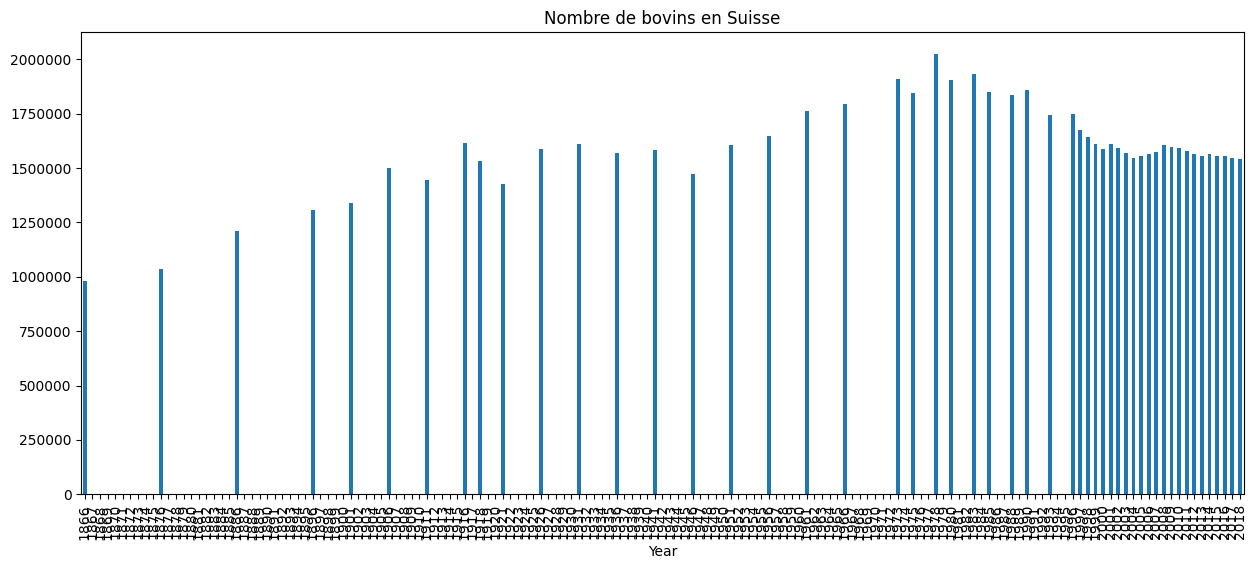

In [18]:
# graphique pour toute la suisse 
df_elevage_bovins2['CH'].plot.bar(figsize=(15, 6), lw=2, title='Nombre de bovins en Suisse')
plt.ticklabel_format(style='plain', axis='y')

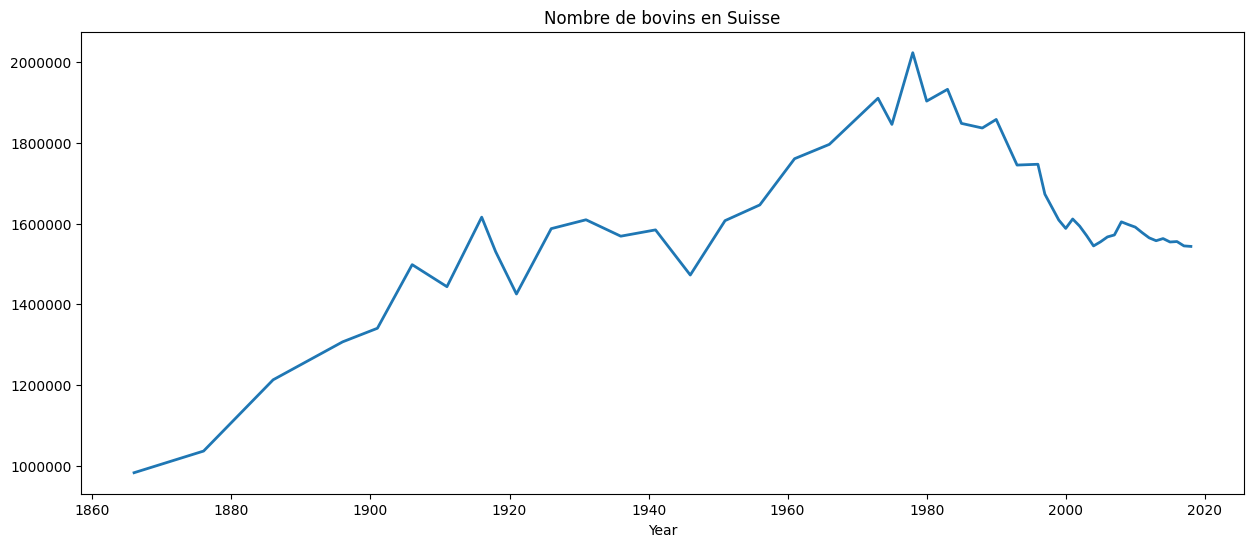

In [19]:
# graphique pour toute la suisse 
df_elevage_bovins3['CH'].plot(figsize=(15, 6), lw=2, title='Nombre de bovins en Suisse')
plt.ticklabel_format(style='plain', axis='y')

In [20]:
from ipywidgets import interact

@interact
def plot(n=(1, 20)):
    fig, ax = plt.subplots(1, 1, figsize=(15, 8))
    df_elevage_bovins3['CH'].rolling(window=n).mean().plot(ax=ax)
    plt.ticklabel_format(style='plain', axis='y')
    ax.set_ylim(900000, 2000000)
    ax.legend(loc='upper right', fontsize='small')
    plt.show()

interactive(children=(IntSlider(value=10, description='n', max=20, min=1), Output()), _dom_classes=('widget-in…

<Axes: title={'center': 'Nombre de bovins en VD, FR et BE'}, xlabel='Year'>

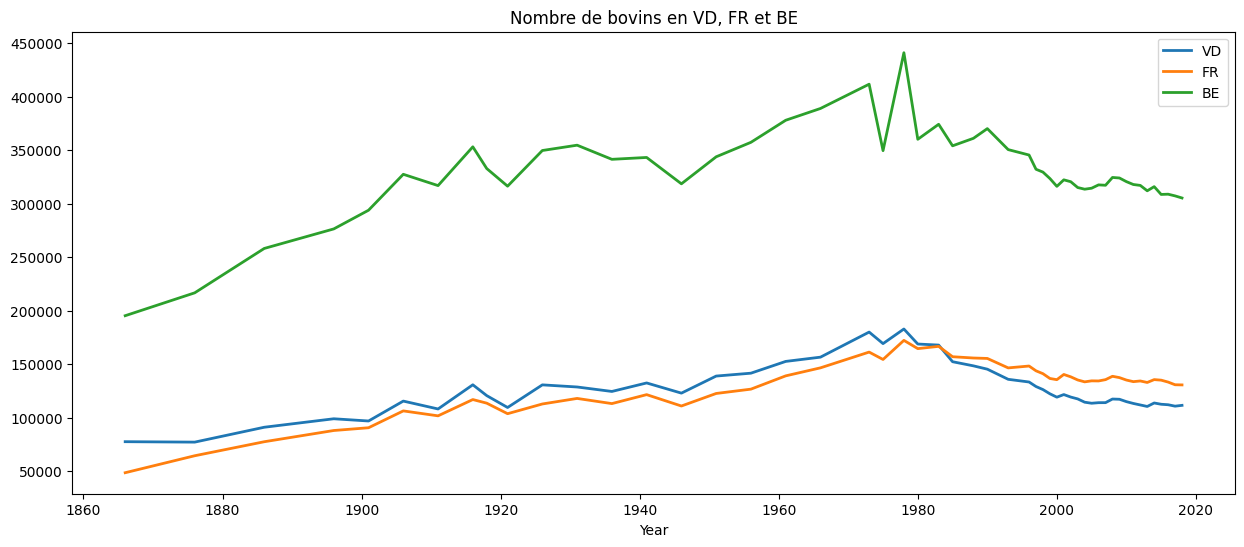

In [21]:
# graphique pour 3 cantons
df_elevage_bovins3[['VD', 'FR', 'BE']].plot(figsize=(15, 6), lw=2, title='Nombre de bovins en VD, FR et BE')

### 9. Importer les données de population de l'OFS et HSSO

In [22]:
df_population_ofs_2018 =  pd.read_excel(url_population_ofs, sheet_name='2018' , skiprows=3, nrows=28, usecols='A,H', names=('canton', '2018'))
df_population_ofs_2018.iloc[0,0] = 'Suisse'
df_population_ofs_2018

,canton,2018
0,Suisse,8544527
1,Zurich,1520968
2,Berne,1034977
3,Lucerne,409557
4,Uri,36433
5,Schwytz,159165
6,Obwald,37841
7,Nidwald,43223
8,Glaris,40403
9,Zoug,126837


In [23]:
# comparer avec la population
# fichier OFS : une année par onglet et 1 lignes en trop en haut
df_population_ofs = pd.DataFrame()
for annee in range (1991, 2019) :
    if annee > 2010 :
        df_population_ofs_temp =  pd.read_excel(url_population_ofs, sheet_name=str(annee) , skiprows=3, nrows=27, usecols='A,H', names=('canton', str(annee)))
    else :
        df_population_ofs_temp =  pd.read_excel(url_population_ofs, sheet_name=str(annee) , skiprows=4, nrows=27, usecols='A,H', names=('canton', str(annee)))
    # corriger la valeur pour la Suisse qui a des numéros de notes
    df_population_ofs_temp.iloc[0,0] = 'Suisse'
    # ajouter index et append colonnes
    df_population_ofs_temp = df_population_ofs_temp.set_index('canton')
    df_population_ofs = pd.concat([df_population_ofs, df_population_ofs_temp], axis=1)
    print (str(annee))
df_population_ofs


1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018


,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
canton,,,,,,,,,,,,,,,,,,,,,
Suisse,6842768,6907959,6968570,7019019,7062354,7081346,7096465,7123537,7164444,7204055,...,7785806,7864012,7954662,8039060,8139631,8237666,8327126,8419550,8484130,8544527
Zurich,1151718,1158077,1162083,1168567,1175457,1178848,1181614,1187609,1198569,1211647,...,1351297,1368822,1392396,1408575,1425538,1446354,1466424,1487969,1504346,1520968
Berne,949770,953458,956617,941747,941952,940928,938647,941144,943427,943696,...,974235,978248,985046,992617,1001281,1009418,1017483,1026513,1031126,1034977
Lucerne,326283,331830,335385,337941,340536,341809,342916,343254,345357,347209,...,372964,376395,381966,386082,390349,394604,398762,403397,406506,409557
Uri,35363,35544,35727,35933,35876,35861,35769,35612,35487,35246,...,35335,35301,35382,35693,35865,36008,35973,36145,36299,36433
Schwytz,113553,116090,118528,120576,122409,123788,125149,126479,128248,130232,...,144686,146285,147904,149830,151396,152759,154093,155863,157301,159165
Obwald,29712,30247,30837,30958,31310,31440,31831,31989,32225,32414,...,35032,35492,35885,36115,36507,36834,37076,37378,37575,37841
Nidwald,34344,34866,35393,35983,36466,36794,37232,37320,37657,38000,...,40794,40922,41311,41584,41888,42080,42420,42556,42969,43223
Glaris,38720,38976,39138,39388,39410,39161,38735,38698,38708,38546,...,38479,38568,39217,39369,39593,39794,40028,40147,40349,40403


In [24]:
# Renommer les cantons
df_population_ofs = df_population_ofs.rename(index={'Suisse' : 'CH', 'Zurich' : 'ZH', 'Berne' : 'BE',
                                                              'Lucerne' : 'LU', 'Uri' : 'UR', 'Schwytz' : 'SZ',
                                                              'Obwald' : 'OW', 'Nidwald' : 'NW', 'Glaris' : 'GL',
                                                              'Zoug' : 'ZG', 'Fribourg' : 'FR', 'Soleure' : 'SO',
                                                              'Bâle-Ville' : 'BS', 'Bâle-Campagne' : 'BL',
                                                              'Schaffhouse' : 'SH', 'Appenzell Rh.-Ext.' : 'AR',
                                                              'Appenzell Rh.-Int.' : 'AI', 'Saint-Gall' : 'SG',
                                                              'Grisons' : 'GR',
                                                              'Argovie' : 'AG', 'Thurgovie' : 'TG',
                                                              'Tessin' : 'TI', 'Vaud' : 'VD', 'Valais' : 'VS',
                                                              'Neuchâtel' : 'NE', 'Genève' : 'GE', 'Jura' : 'JU'})
df_population_ofs

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
canton,,,,,,,,,,,,,,,,,,,,,
CH,6842768,6907959,6968570,7019019,7062354,7081346,7096465,7123537,7164444,7204055,...,7785806,7864012,7954662,8039060,8139631,8237666,8327126,8419550,8484130,8544527
ZH,1151718,1158077,1162083,1168567,1175457,1178848,1181614,1187609,1198569,1211647,...,1351297,1368822,1392396,1408575,1425538,1446354,1466424,1487969,1504346,1520968
BE,949770,953458,956617,941747,941952,940928,938647,941144,943427,943696,...,974235,978248,985046,992617,1001281,1009418,1017483,1026513,1031126,1034977
LU,326283,331830,335385,337941,340536,341809,342916,343254,345357,347209,...,372964,376395,381966,386082,390349,394604,398762,403397,406506,409557
UR,35363,35544,35727,35933,35876,35861,35769,35612,35487,35246,...,35335,35301,35382,35693,35865,36008,35973,36145,36299,36433
SZ,113553,116090,118528,120576,122409,123788,125149,126479,128248,130232,...,144686,146285,147904,149830,151396,152759,154093,155863,157301,159165
OW,29712,30247,30837,30958,31310,31440,31831,31989,32225,32414,...,35032,35492,35885,36115,36507,36834,37076,37378,37575,37841
NW,34344,34866,35393,35983,36466,36794,37232,37320,37657,38000,...,40794,40922,41311,41584,41888,42080,42420,42556,42969,43223
GL,38720,38976,39138,39388,39410,39161,38735,38698,38708,38546,...,38479,38568,39217,39369,39593,39794,40028,40147,40349,40403


In [25]:
# transposer
df_population_ofs = df_population_ofs.transpose()
df_population_ofs

canton,CH,ZH,BE,LU,UR,SZ,OW,NW,GL,ZG,...,SG,GR,AG,TG,TI,VD,VS,NE,GE,JU
1991,6842768,1151718,949770,326283,35363,113553,29712,34344,38720,85882,...,427648,176188,506818,210542,290000,587283,257730,161774,381404,67528
1992,6907959,1158077,953458,331830,35544,116090,30247,34866,38976,87065,...,432819,179279,511979,213167,294108,593007,262389,162581,383911,68323
1993,6968570,1162083,956617,335385,35727,118528,30837,35393,39138,88583,...,436967,181957,518945,217129,297955,596736,266713,163884,387606,68626
1994,7019019,1168567,941747,337941,35933,120576,30958,35983,39388,90412,...,440744,184155,523114,220335,302131,602099,269341,164176,391699,68979
1995,7062354,1175457,941952,340536,35876,122409,31310,36466,39410,92392,...,442350,185063,528887,223372,305199,605677,271291,165258,395466,69188
1996,7081346,1178848,940928,341809,35861,123788,31440,36794,39161,93737,...,443839,185999,531665,224822,304830,606471,272315,165232,394588,68948
1997,7096465,1181614,938647,342916,35769,125149,31831,37232,38735,95098,...,443880,185532,534028,225395,305588,608153,273362,165410,396659,68964
1998,7123537,1187609,941144,343254,35612,126479,31989,37320,38698,96517,...,444891,186118,536462,226479,306179,611613,274458,165594,398910,68995
1999,7164444,1198569,943427,345357,35487,128248,32225,37657,38708,97758,...,447609,186026,540639,227285,308498,616275,275632,165649,403067,68818
2000,7204055,1211647,943696,347209,35246,130232,32414,38000,38546,99388,...,449399,186744,544306,227306,310215,620294,276170,165731,408820,68794


In [26]:
# modifier le type de l'année et renommer l'index
df_population_ofs = df_population_ofs.reset_index()
df_population_ofs['Year'] = df_population_ofs['index'].astype(int)
del df_population_ofs['index']
df_population_ofs = df_population_ofs.set_index('Year')
df_population_ofs

canton,CH,ZH,BE,LU,UR,SZ,OW,NW,GL,ZG,...,SG,GR,AG,TG,TI,VD,VS,NE,GE,JU
Year,,,,,,,,,,,,,,,,,,,,,
1991,6842768,1151718,949770,326283,35363,113553,29712,34344,38720,85882,...,427648,176188,506818,210542,290000,587283,257730,161774,381404,67528
1992,6907959,1158077,953458,331830,35544,116090,30247,34866,38976,87065,...,432819,179279,511979,213167,294108,593007,262389,162581,383911,68323
1993,6968570,1162083,956617,335385,35727,118528,30837,35393,39138,88583,...,436967,181957,518945,217129,297955,596736,266713,163884,387606,68626
1994,7019019,1168567,941747,337941,35933,120576,30958,35983,39388,90412,...,440744,184155,523114,220335,302131,602099,269341,164176,391699,68979
1995,7062354,1175457,941952,340536,35876,122409,31310,36466,39410,92392,...,442350,185063,528887,223372,305199,605677,271291,165258,395466,69188
1996,7081346,1178848,940928,341809,35861,123788,31440,36794,39161,93737,...,443839,185999,531665,224822,304830,606471,272315,165232,394588,68948
1997,7096465,1181614,938647,342916,35769,125149,31831,37232,38735,95098,...,443880,185532,534028,225395,305588,608153,273362,165410,396659,68964
1998,7123537,1187609,941144,343254,35612,126479,31989,37320,38698,96517,...,444891,186118,536462,226479,306179,611613,274458,165594,398910,68995
1999,7164444,1198569,943427,345357,35487,128248,32225,37657,38708,97758,...,447609,186026,540639,227285,308498,616275,275632,165649,403067,68818


In [27]:
# fichier HSSO pour la population : 6 lignes en trop en haut
df_population_hsso = pd.read_excel(url_population_hsso, skiprows=2, nrows=38)
df_population_hsso

,Jahr,ZH,"BE, JU",BE (1),LU,UR,SZ,OW,NW,GL,...,AG,TG,TI,VD,VS,NE,GE,JU,CH,Année
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1671,120800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,88000,NaN,NaN,NaN,NaN,NaN,NaN,1671
2,1690*,a)119400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a)1200000,*1690
3,1732/34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1732/34
4,1743,NaN,NaN,NaN,75200.000000,9800.000000,25815.0,9000.0,7800.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1743
5,1751/52,b)143400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12200,...,NaN,NaN,NaN,NaN,NaN,32335.0,NaN,NaN,NaN,1751/52
6,1760/62,172200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,32428.0,NaN,NaN,NaN,1760/62
7,1764/68,175000,c)292500,NaN,NaN,13500.000000,29172.0,NaN,NaN,NaN,...,NaN,NaN,NaN,112300,NaN,34000.0,NaN,NaN,NaN,1764/66
8,1771/74,152200,NaN,NaN,81000.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,35335.0,NaN,NaN,NaN,1771/74
9,1778/85,174600,NaN,NaN,77400.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,40118.0,NaN,NaN,NaN,1778/85


In [28]:
# garder seulement les lignes depuis 1850
df_population_hsso = df_population_hsso.iloc[22:37]
df_population_hsso

,Jahr,ZH,"BE, JU",BE (1),LU,UR,SZ,OW,NW,GL,...,AG,TG,TI,VD,VS,NE,GE,JU,CH,Année
22,1850,250698,458301,413468.0,132843.0,14505.0,44168.0,13799.0,11339.0,30213,...,199852.0,88908,117759,199575,81559.0,70753.0,64146.0,44833.0,2392740,1850
23,1860,266265,467141,419518.0,130504.0,14741.0,45039.0,13376.0,11526.0,33363,...,194208.0,90080,116343,213157,90792.0,87369.0,82876.0,47623.0,2510494,1860
24,1870,284047,501501,450537.0,132153.0,16095.0,47733.0,14443.0,11701.0,35208,...,198718.0,93202,121591,229588,96722.0,95425.0,88791.0,50964.0,2655001,1870
25,1880,316074,530411,478364.0,134708.0,23744.0,51109.0,15329.0,11979.0,34242,...,198357.0,99231,130394,235349,100190.0,102744.0,99712.0,52047.0,2831787,1880
26,1888,337183,536679,482976.0,135360.0,17249.0,50307.0,15043.0,12538.0,33825,...,193580.0,104678,126751,247655,101985.0,108153.0,105509.0,53703.0,2917754,1888
27,1900,431036,589433,531973.0,146519.0,19700.0,55385.0,15260.0,13070.0,32349,...,206498.0,113221,138638,281379,114438.0,126279.0,132609.0,57460.0,3315443,1900
28,1910,503915,645877,587100.0,167223.0,22113.0,58428.0,17161.0,13788.0,33316,...,230634.0,134917,156166,317457,128381.0,133061.0,154906.0,58777.0,3753293,1910
29,1920,538602,674394,615916.0,177073.0,23973.0,59731.0,17567.0,13956.0,33834,...,240776.0,135933,152256,317498,128246.0,131349.0,171000.0,58478.0,3880320,1920
30,1930,617706,688774,633161.0,189391.0,22968.0,62337.0,19401.0,15055.0,35653,...,259644.0,136063,159223,331853,136394.0,124324.0,171366.0,55613.0,4066400,1930
31,1941,674505,728916,672563.0,206608.0,27302.0,66555.0,20340.0,17348.0,34771,...,270463.0,138122,161882,343398,148319.0,117900.0,174855.0,56353.0,4265703,1941


In [29]:
# suppriner la dernière colonne et transformer l'année en int
del df_population_hsso['Année']
df_population_hsso['Year'] = df_population_hsso['Jahr'].astype(int)
del df_population_hsso['Jahr']
df_population_hsso = df_population_hsso.set_index('Year')
df_population_hsso

C:\Users\pablo\AppData\Local\Temp\ipykernel_3112\644738998.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_population_hsso['Year'] = df_population_hsso['Jahr'].astype(int)


,ZH,"BE, JU",BE (1),LU,UR,SZ,OW,NW,GL,ZG,...,GR,AG,TG,TI,VD,VS,NE,GE,JU,CH
Year,,,,,,,,,,,,,,,,,,,,,
1850,250698,458301,413468.0,132843.0,14505.0,44168.0,13799.0,11339.0,30213,17461.0,...,89895.0,199852.0,88908,117759,199575,81559.0,70753.0,64146.0,44833.0,2392740
1860,266265,467141,419518.0,130504.0,14741.0,45039.0,13376.0,11526.0,33363,19608.0,...,90713.0,194208.0,90080,116343,213157,90792.0,87369.0,82876.0,47623.0,2510494
1870,284047,501501,450537.0,132153.0,16095.0,47733.0,14443.0,11701.0,35208,20925.0,...,92103.0,198718.0,93202,121591,229588,96722.0,95425.0,88791.0,50964.0,2655001
1880,316074,530411,478364.0,134708.0,23744.0,51109.0,15329.0,11979.0,34242,22829.0,...,93864.0,198357.0,99231,130394,235349,100190.0,102744.0,99712.0,52047.0,2831787
1888,337183,536679,482976.0,135360.0,17249.0,50307.0,15043.0,12538.0,33825,23029.0,...,94810.0,193580.0,104678,126751,247655,101985.0,108153.0,105509.0,53703.0,2917754
1900,431036,589433,531973.0,146519.0,19700.0,55385.0,15260.0,13070.0,32349,25093.0,...,104520.0,206498.0,113221,138638,281379,114438.0,126279.0,132609.0,57460.0,3315443
1910,503915,645877,587100.0,167223.0,22113.0,58428.0,17161.0,13788.0,33316,28156.0,...,117069.0,230634.0,134917,156166,317457,128381.0,133061.0,154906.0,58777.0,3753293
1920,538602,674394,615916.0,177073.0,23973.0,59731.0,17567.0,13956.0,33834,31569.0,...,119854.0,240776.0,135933,152256,317498,128246.0,131349.0,171000.0,58478.0,3880320
1930,617706,688774,633161.0,189391.0,22968.0,62337.0,19401.0,15055.0,35653,34395.0,...,126340.0,259644.0,136063,159223,331853,136394.0,124324.0,171366.0,55613.0,4066400


In [30]:
# Supprimer la colonne pour BE,JU et renommer celle de BE(1)
del df_population_hsso['BE, JU']
df_population_hsso = df_population_hsso.rename(columns={'BE (1)' : 'BE'})
df_population_hsso

,ZH,BE,LU,UR,SZ,OW,NW,GL,ZG,FR,...,GR,AG,TG,TI,VD,VS,NE,GE,JU,CH
Year,,,,,,,,,,,,,,,,,,,,,
1850,250698,413468.0,132843.0,14505.0,44168.0,13799.0,11339.0,30213,17461.0,99891.0,...,89895.0,199852.0,88908,117759,199575,81559.0,70753.0,64146.0,44833.0,2392740
1860,266265,419518.0,130504.0,14741.0,45039.0,13376.0,11526.0,33363,19608.0,105523.0,...,90713.0,194208.0,90080,116343,213157,90792.0,87369.0,82876.0,47623.0,2510494
1870,284047,450537.0,132153.0,16095.0,47733.0,14443.0,11701.0,35208,20925.0,110409.0,...,92103.0,198718.0,93202,121591,229588,96722.0,95425.0,88791.0,50964.0,2655001
1880,316074,478364.0,134708.0,23744.0,51109.0,15329.0,11979.0,34242,22829.0,114994.0,...,93864.0,198357.0,99231,130394,235349,100190.0,102744.0,99712.0,52047.0,2831787
1888,337183,482976.0,135360.0,17249.0,50307.0,15043.0,12538.0,33825,23029.0,119155.0,...,94810.0,193580.0,104678,126751,247655,101985.0,108153.0,105509.0,53703.0,2917754
1900,431036,531973.0,146519.0,19700.0,55385.0,15260.0,13070.0,32349,25093.0,127951.0,...,104520.0,206498.0,113221,138638,281379,114438.0,126279.0,132609.0,57460.0,3315443
1910,503915,587100.0,167223.0,22113.0,58428.0,17161.0,13788.0,33316,28156.0,139654.0,...,117069.0,230634.0,134917,156166,317457,128381.0,133061.0,154906.0,58777.0,3753293
1920,538602,615916.0,177073.0,23973.0,59731.0,17567.0,13956.0,33834,31569.0,143055.0,...,119854.0,240776.0,135933,152256,317498,128246.0,131349.0,171000.0,58478.0,3880320
1930,617706,633161.0,189391.0,22968.0,62337.0,19401.0,15055.0,35653,34395.0,143230.0,...,126340.0,259644.0,136063,159223,331853,136394.0,124324.0,171366.0,55613.0,4066400


In [31]:
# fusion de deux fichiers
df_population = pd.concat([df_population_hsso, df_population_ofs]).sort_index()
df_population

,ZH,BE,LU,UR,SZ,OW,NW,GL,ZG,FR,...,GR,AG,TG,TI,VD,VS,NE,GE,JU,CH
Year,,,,,,,,,,,,,,,,,,,,,
1850,250698,413468.0,132843.0,14505.0,44168.0,13799.0,11339.0,30213,17461.0,99891.0,...,89895.0,199852.0,88908,117759,199575,81559.0,70753.0,64146.0,44833.0,2392740
1860,266265,419518.0,130504.0,14741.0,45039.0,13376.0,11526.0,33363,19608.0,105523.0,...,90713.0,194208.0,90080,116343,213157,90792.0,87369.0,82876.0,47623.0,2510494
1870,284047,450537.0,132153.0,16095.0,47733.0,14443.0,11701.0,35208,20925.0,110409.0,...,92103.0,198718.0,93202,121591,229588,96722.0,95425.0,88791.0,50964.0,2655001
1880,316074,478364.0,134708.0,23744.0,51109.0,15329.0,11979.0,34242,22829.0,114994.0,...,93864.0,198357.0,99231,130394,235349,100190.0,102744.0,99712.0,52047.0,2831787
1888,337183,482976.0,135360.0,17249.0,50307.0,15043.0,12538.0,33825,23029.0,119155.0,...,94810.0,193580.0,104678,126751,247655,101985.0,108153.0,105509.0,53703.0,2917754
1900,431036,531973.0,146519.0,19700.0,55385.0,15260.0,13070.0,32349,25093.0,127951.0,...,104520.0,206498.0,113221,138638,281379,114438.0,126279.0,132609.0,57460.0,3315443
1910,503915,587100.0,167223.0,22113.0,58428.0,17161.0,13788.0,33316,28156.0,139654.0,...,117069.0,230634.0,134917,156166,317457,128381.0,133061.0,154906.0,58777.0,3753293
1920,538602,615916.0,177073.0,23973.0,59731.0,17567.0,13956.0,33834,31569.0,143055.0,...,119854.0,240776.0,135933,152256,317498,128246.0,131349.0,171000.0,58478.0,3880320
1930,617706,633161.0,189391.0,22968.0,62337.0,19401.0,15055.0,35653,34395.0,143230.0,...,126340.0,259644.0,136063,159223,331853,136394.0,124324.0,171366.0,55613.0,4066400


In [32]:
df_population.dtypes

ZH     object
BE    float64
LU    float64
UR    float64
SZ    float64
OW    float64
NW    float64
GL     object
ZG    float64
FR    float64
SO    float64
BS    float64
BL    float64
SH    float64
AR     object
AI    float64
SG    float64
GR    float64
AG    float64
TG     object
TI     object
VD     object
VS    float64
NE    float64
GE    float64
JU    float64
CH     object
dtype: object

In [33]:
# certaines colonnes ne sont pas numériques : conversion à numérique partout
df_population = df_population.apply(pd.to_numeric, errors='coerce')
df_population

,ZH,BE,LU,UR,SZ,OW,NW,GL,ZG,FR,...,GR,AG,TG,TI,VD,VS,NE,GE,JU,CH
Year,,,,,,,,,,,,,,,,,,,,,
1850,250698,413468.0,132843.0,14505.0,44168.0,13799.0,11339.0,30213,17461.0,99891.0,...,89895.0,199852.0,88908,117759,199575,81559.0,70753.0,64146.0,44833.0,2392740
1860,266265,419518.0,130504.0,14741.0,45039.0,13376.0,11526.0,33363,19608.0,105523.0,...,90713.0,194208.0,90080,116343,213157,90792.0,87369.0,82876.0,47623.0,2510494
1870,284047,450537.0,132153.0,16095.0,47733.0,14443.0,11701.0,35208,20925.0,110409.0,...,92103.0,198718.0,93202,121591,229588,96722.0,95425.0,88791.0,50964.0,2655001
1880,316074,478364.0,134708.0,23744.0,51109.0,15329.0,11979.0,34242,22829.0,114994.0,...,93864.0,198357.0,99231,130394,235349,100190.0,102744.0,99712.0,52047.0,2831787
1888,337183,482976.0,135360.0,17249.0,50307.0,15043.0,12538.0,33825,23029.0,119155.0,...,94810.0,193580.0,104678,126751,247655,101985.0,108153.0,105509.0,53703.0,2917754
1900,431036,531973.0,146519.0,19700.0,55385.0,15260.0,13070.0,32349,25093.0,127951.0,...,104520.0,206498.0,113221,138638,281379,114438.0,126279.0,132609.0,57460.0,3315443
1910,503915,587100.0,167223.0,22113.0,58428.0,17161.0,13788.0,33316,28156.0,139654.0,...,117069.0,230634.0,134917,156166,317457,128381.0,133061.0,154906.0,58777.0,3753293
1920,538602,615916.0,177073.0,23973.0,59731.0,17567.0,13956.0,33834,31569.0,143055.0,...,119854.0,240776.0,135933,152256,317498,128246.0,131349.0,171000.0,58478.0,3880320
1930,617706,633161.0,189391.0,22968.0,62337.0,19401.0,15055.0,35653,34395.0,143230.0,...,126340.0,259644.0,136063,159223,331853,136394.0,124324.0,171366.0,55613.0,4066400


In [34]:
df_population.dtypes

ZH      int64
BE    float64
LU    float64
UR    float64
SZ    float64
OW    float64
NW    float64
GL      int64
ZG    float64
FR    float64
SO    float64
BS    float64
BL    float64
SH    float64
AR      int64
AI    float64
SG    float64
GR    float64
AG    float64
TG      int64
TI      int64
VD      int64
VS    float64
NE    float64
GE    float64
JU    float64
CH      int64
dtype: object

In [35]:
# ajouter les années manquantes
df_population2 = df_population.reindex(range(1850, 2019))
df_population2

,ZH,BE,LU,UR,SZ,OW,NW,GL,ZG,FR,...,GR,AG,TG,TI,VD,VS,NE,GE,JU,CH
Year,,,,,,,,,,,,,,,,,,,,,
1850,250698.0,413468.0,132843.0,14505.0,44168.0,13799.0,11339.0,30213.0,17461.0,99891.0,...,89895.0,199852.0,88908.0,117759.0,199575.0,81559.0,70753.0,64146.0,44833.0,2392740.0
1851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,1446354.0,1009418.0,394604.0,36008.0,152759.0,36834.0,42080.0,39794.0,120089.0,303377.0,...,195886.0,645277.0,263733.0,350363.0,761446.0,331763.0,177327.0,477385.0,72410.0,8237666.0
2015,1466424.0,1017483.0,398762.0,35973.0,154093.0,37076.0,42420.0,40028.0,122134.0,307461.0,...,196610.0,653675.0,267429.0,351946.0,773407.0,335696.0,178107.0,484736.0,72782.0,8327126.0
2016,1487969.0,1026513.0,403397.0,36145.0,155863.0,37378.0,42556.0,40147.0,123948.0,311914.0,...,197550.0,663462.0,270709.0,354375.0,784822.0,339176.0,178567.0,489524.0,73122.0,8419550.0


In [36]:
# ajouter une interpolation linaire pour remplir les vides
df_population3 = df_population2.interpolate(method='linear', axis=0)
df_population3

,ZH,BE,LU,UR,SZ,OW,NW,GL,ZG,FR,...,GR,AG,TG,TI,VD,VS,NE,GE,JU,CH
Year,,,,,,,,,,,,,,,,,,,,,
1850,250698.0,413468.0,132843.0,14505.0,44168.0,13799.0,11339.0,30213.0,17461.0,99891.0,...,89895.0,199852.0,88908.0,117759.0,199575.0,81559.0,70753.0,64146.0,44833.0,2392740.0
1851,252254.7,414073.0,132609.1,14528.6,44255.1,13756.7,11357.7,30528.0,17675.7,100454.2,...,89976.8,199287.6,89025.2,117617.4,200933.2,82482.3,72414.6,66019.0,45112.0,2404515.4
1852,253811.4,414678.0,132375.2,14552.2,44342.2,13714.4,11376.4,30843.0,17890.4,101017.4,...,90058.6,198723.2,89142.4,117475.8,202291.4,83405.6,74076.2,67892.0,45391.0,2416290.8
1853,255368.1,415283.0,132141.3,14575.8,44429.3,13672.1,11395.1,31158.0,18105.1,101580.6,...,90140.4,198158.8,89259.6,117334.2,203649.6,84328.9,75737.8,69765.0,45670.0,2428066.2
1854,256924.8,415888.0,131907.4,14599.4,44516.4,13629.8,11413.8,31473.0,18319.8,102143.8,...,90222.2,197594.4,89376.8,117192.6,205007.8,85252.2,77399.4,71638.0,45949.0,2439841.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,1446354.0,1009418.0,394604.0,36008.0,152759.0,36834.0,42080.0,39794.0,120089.0,303377.0,...,195886.0,645277.0,263733.0,350363.0,761446.0,331763.0,177327.0,477385.0,72410.0,8237666.0
2015,1466424.0,1017483.0,398762.0,35973.0,154093.0,37076.0,42420.0,40028.0,122134.0,307461.0,...,196610.0,653675.0,267429.0,351946.0,773407.0,335696.0,178107.0,484736.0,72782.0,8327126.0
2016,1487969.0,1026513.0,403397.0,36145.0,155863.0,37378.0,42556.0,40147.0,123948.0,311914.0,...,197550.0,663462.0,270709.0,354375.0,784822.0,339176.0,178567.0,489524.0,73122.0,8419550.0


In [37]:
# export en CSV du fichier original
df_population2.to_csv('export_population_suisse_1850_2018.tsv', sep='\t')

In [38]:
# export en CSV
df_population3.to_csv('export_population_suisse_1850_2018_extrapolation.tsv', sep='\t')

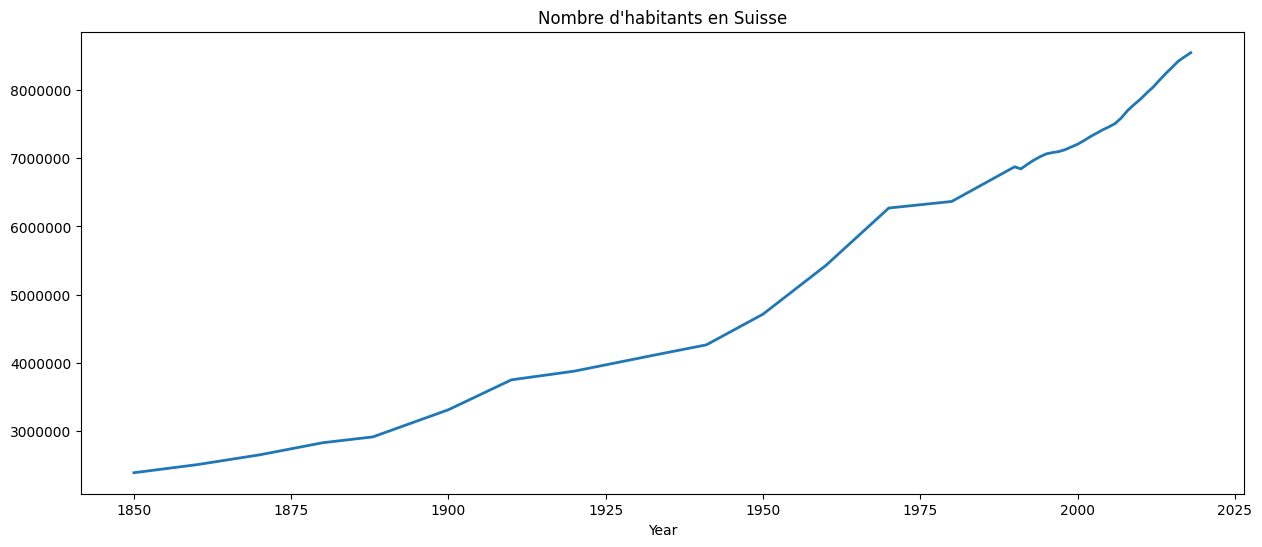

In [39]:
# graphique pour toute la suisse 
df_population3['CH'].plot(figsize=(15, 6), lw=2, title='Nombre d\'habitants en Suisse')
plt.ticklabel_format(style='plain', axis='y')

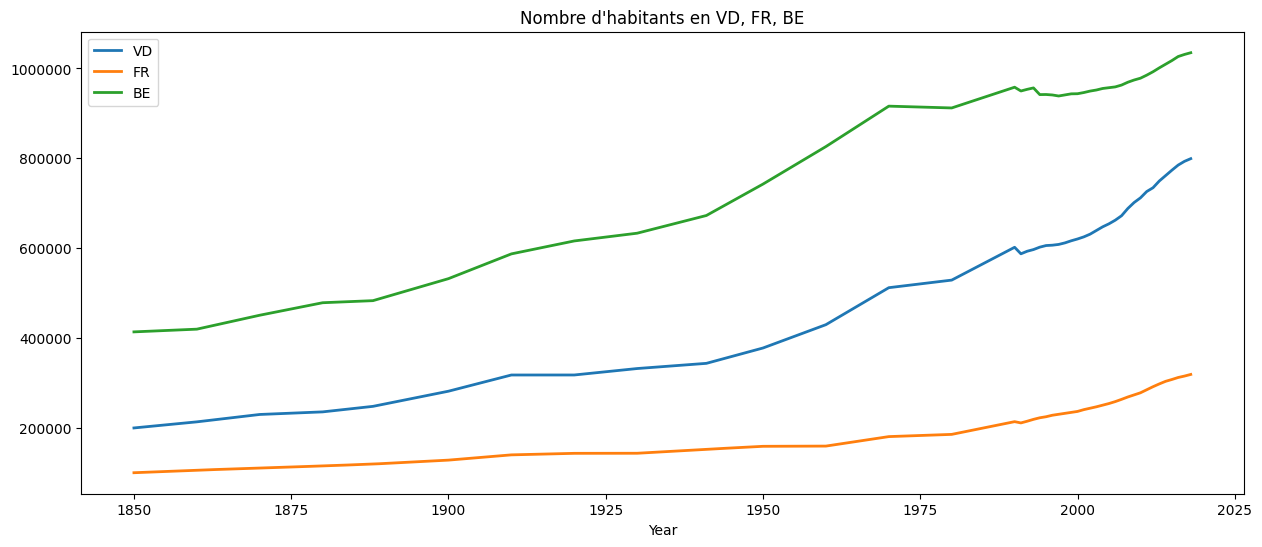

In [40]:
# graphique pour 3 cantons
df_population3[['VD', 'FR', 'BE']].plot(figsize=(15, 6), lw=2, title='Nombre d\'habitants en VD, FR, BE')
plt.ticklabel_format(style='plain', axis='y')

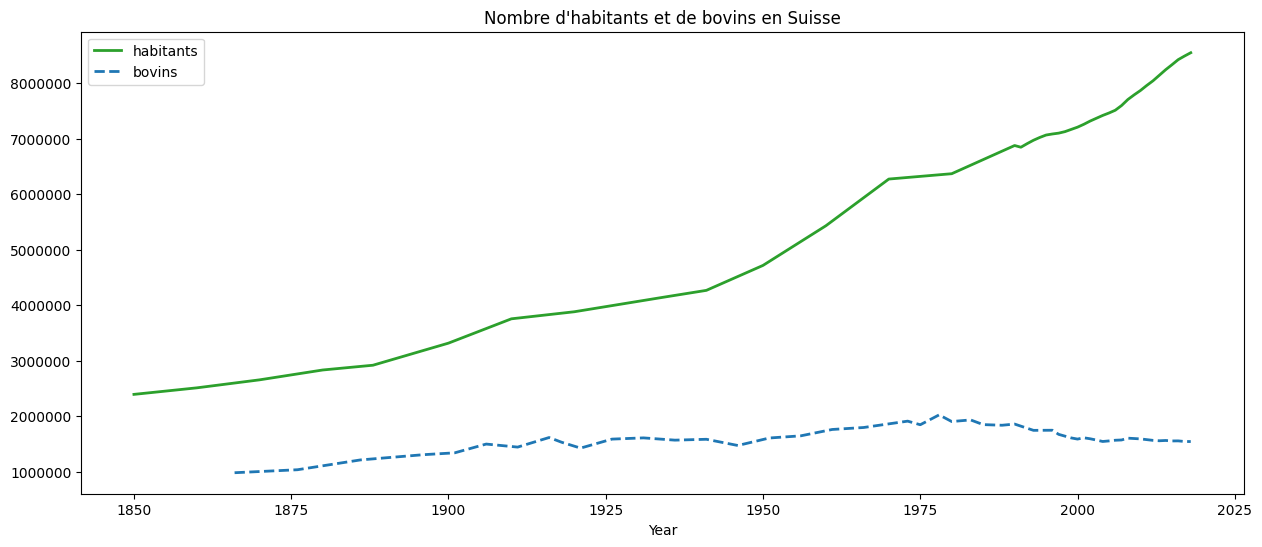

In [41]:
# graphique de population et des bovins pour toute la suisse 
ax = df_population3['CH'].plot(figsize=(15, 6), lw=2, color='#2ca02c', title='Nombre d\'habitants et de bovins en Suisse')
ax2 = df_elevage_bovins3['CH'].plot(figsize=(15, 6), style='--', lw=2, color='#1f77b4')
ax2.legend(['habitants','bovins'])
plt.ticklabel_format(style='plain', axis='y')

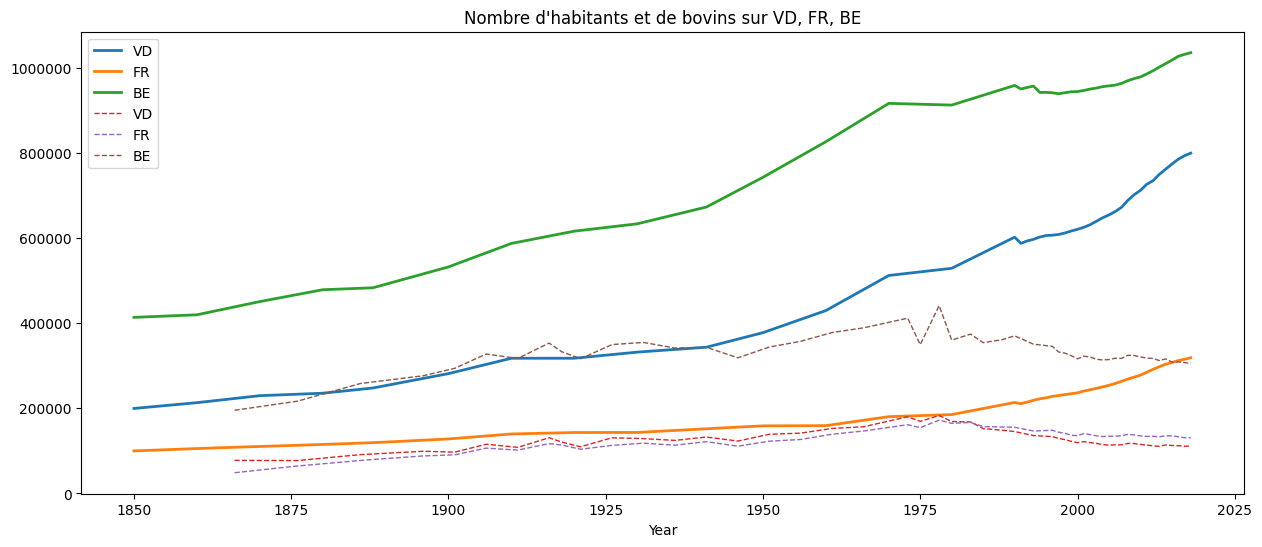

In [42]:
# graphique de population et des bovins pour quelques cantons 
ax = df_population3[['VD', 'FR', 'BE']].plot(figsize=(15, 6), lw=2, title='Nombre d\'habitants et de bovins sur VD, FR, BE')
df_elevage_bovins3[['VD', 'FR', 'BE']].plot(ax=ax, style='--', lw=1)
plt.ticklabel_format(style='plain', axis='y')

<Axes: xlabel='Year'>

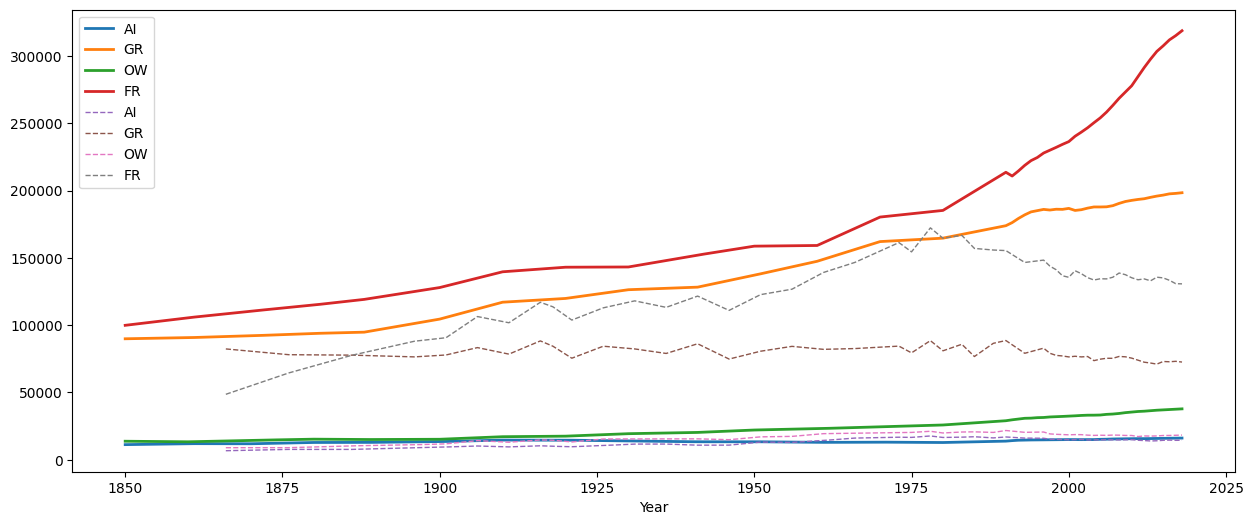

In [43]:
# graphique de population et des bovins pour quelques cantons
ax = df_population3[['AI', 'GR', 'OW', 'FR']].plot(figsize=(15, 6), lw=2)
df_elevage_bovins3[['AI', 'GR', 'OW', 'FR']].plot(ax=ax, style='--', lw=1)

<Axes: xlabel='Year'>

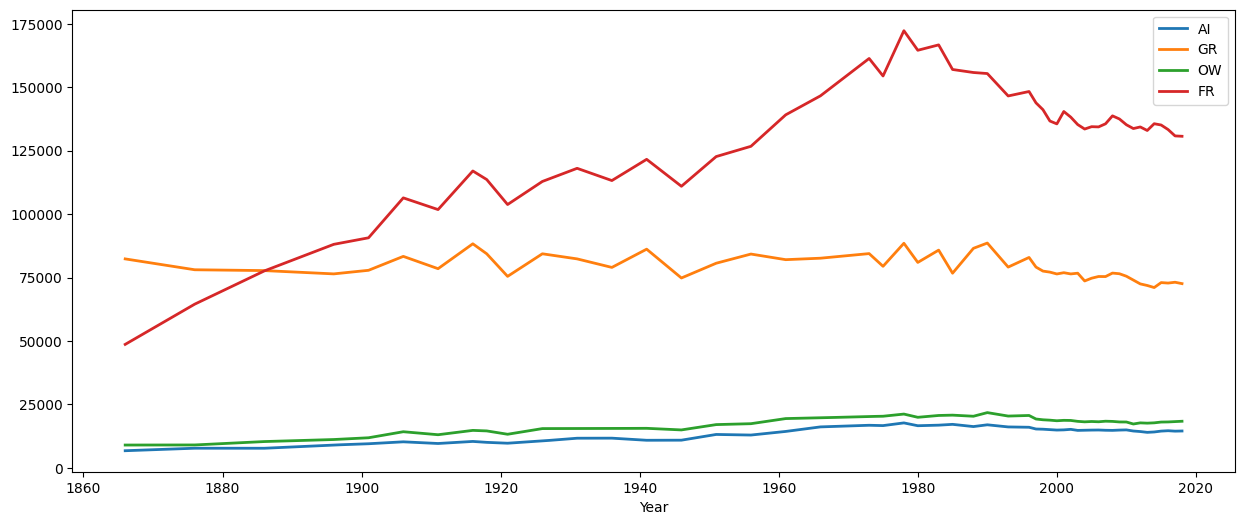

In [44]:
# graphique de population et des bovins pour quelques cantons
df_elevage_bovins3[['AI', 'GR', 'OW', 'FR']].plot(figsize=(15, 6), lw=2)

### 10. Calculer le ratio du nombre de bovins par habitant

In [45]:
# ration de bovins par habitant
df = df_elevage_bovins3 / df_population3
df

,ZH,BE,LU,UR,SZ,OW,NW,GL,ZG,FR,...,GR,AG,TG,TI,VD,VS,NE,GE,JU,CH
Year,,,,,,,,,,,,,,,,,,,,,
1850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,0.066249,0.312940,0.378113,0.314263,0.283617,0.481566,0.283603,0.283761,0.170590,0.447084,...,0.362777,0.137298,0.272146,0.029992,0.149460,0.094643,0.229604,0.005622,0.819956,0.189714
2015,0.064861,0.303306,0.370371,0.331109,0.280207,0.486757,0.284653,0.289572,0.166727,0.439493,...,0.371385,0.133387,0.271665,0.027999,0.145612,0.094455,0.228638,0.005576,0.814844,0.186657
2016,0.064366,0.300866,0.371872,0.328731,0.278276,0.484028,0.278457,0.296411,0.165376,0.427474,...,0.368666,0.129748,0.270316,0.027733,0.142914,0.094494,0.230239,0.005467,0.809237,0.184736


In [46]:
# export en CSV du fichier final
df.to_csv('export_ratio_bovins_par_habitant_suisse_1850_2018.tsv', sep='\t')

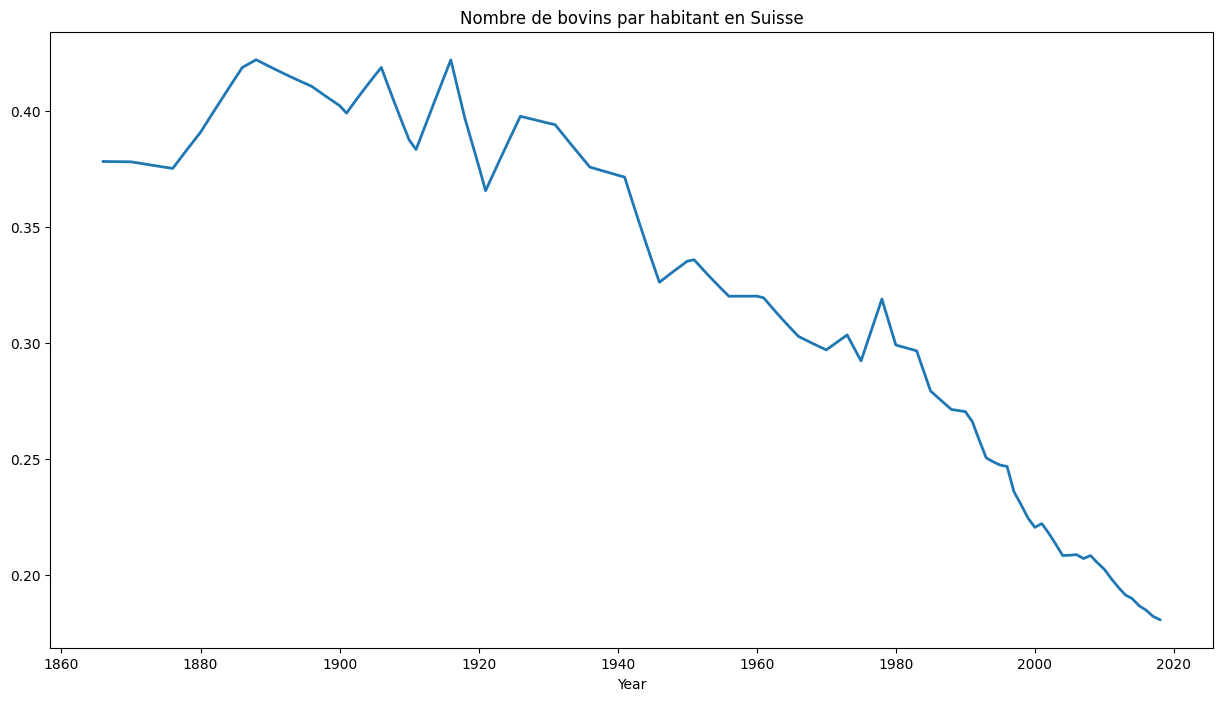

In [47]:
# graphique de population et des bovins pour toute la suisse 
fig = plt.figure()
ax = df['CH'].plot(figsize=(15, 8), lw=2, title='Nombre de bovins par habitant en Suisse')
# ax.legend(loc='upper right', bbox_to_anchor=(1.08, 1), ncol=1)
plt.show()

<Figure size 640x480 with 0 Axes>

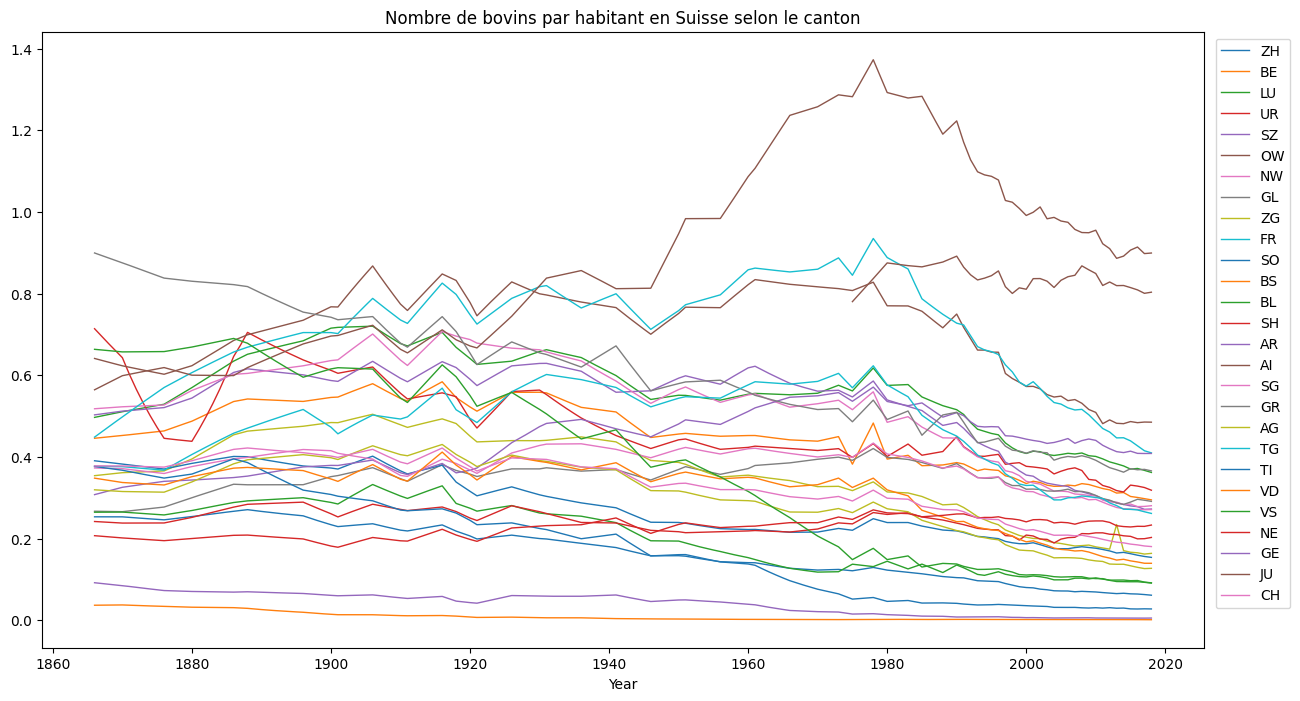

In [48]:
# graphique de population et des bovins pour toute la suisse 
fig = plt.figure()
ax = df.plot(figsize=(15, 8), lw=1, title='Nombre de bovins par habitant en Suisse selon le canton')
ax.legend(loc='upper right', bbox_to_anchor=(1.08, 1), ncol=1)
plt.show()

<Axes: xlabel='Year'>

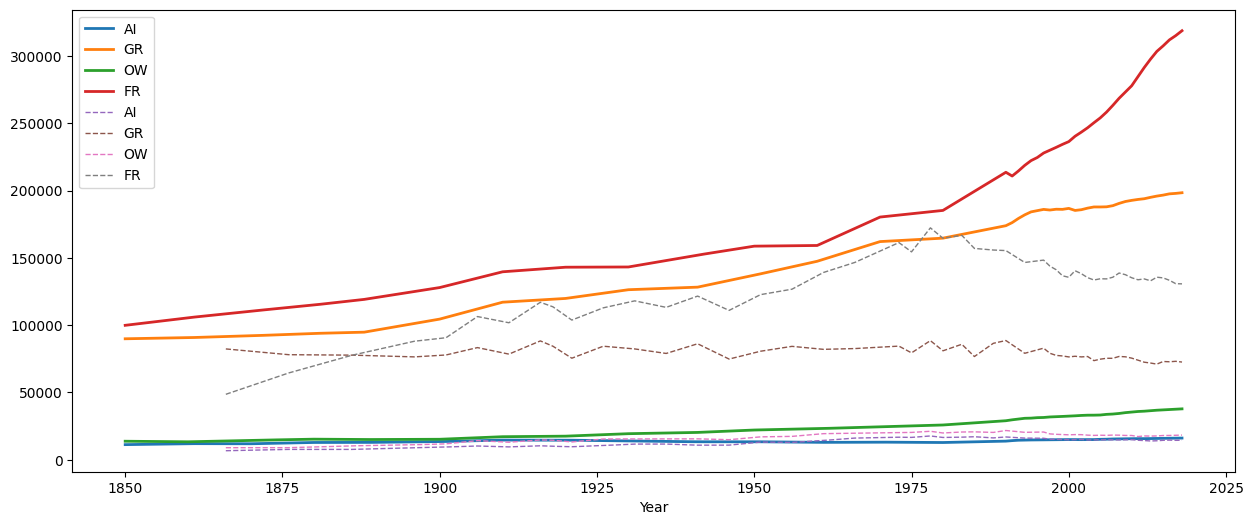

In [49]:
# graphique de population et des bovins pour quelques cantons
ax = df_population3[['AI', 'GR', 'OW', 'FR']].plot(figsize=(15, 6), lw=2)
df_elevage_bovins3[['AI', 'GR', 'OW', 'FR']].plot(ax=ax, style='--', lw=1)

<Axes: title={'center': 'Nombre de bovins par habitant sur AI, GR, VD, OW, FR, JU et UR'}, xlabel='Year'>

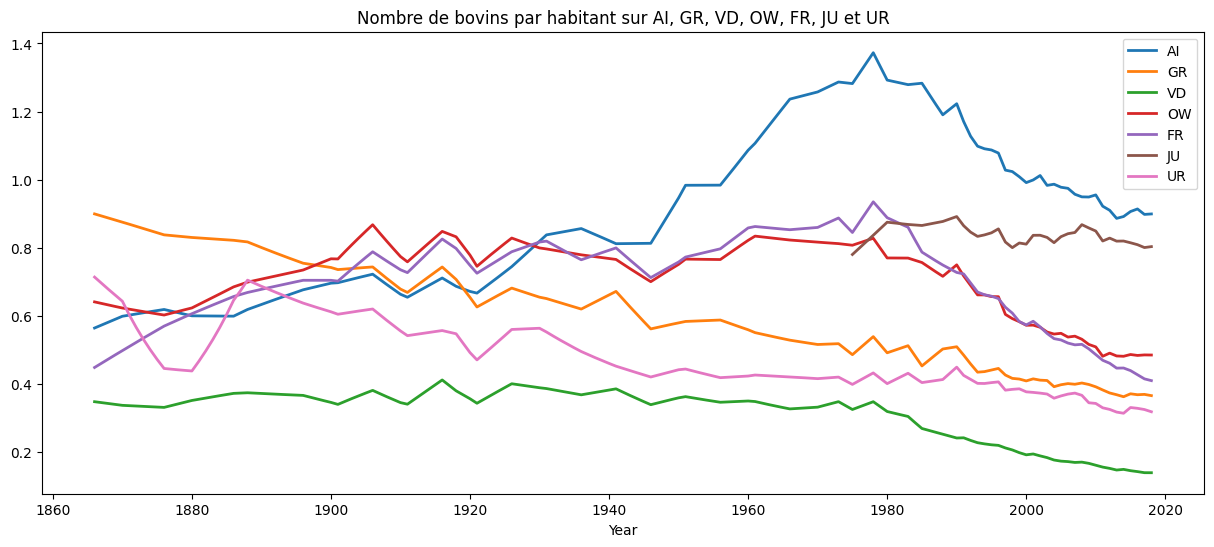

In [50]:
# graphique de population et des bovins pour quelques cantons
df[['AI', 'GR', 'VD', 'OW', 'FR', 'JU', 'UR']].plot(figsize=(15, 6), lw=2, title='Nombre de bovins par habitant sur AI, GR, VD, OW, FR, JU et UR')

In [51]:
# données pour l'année du livre
df.loc[2012]

ZH    0.066794
BE    0.319406
LU    0.387972
UR    0.325526
SZ    0.292925
OW    0.490793
NW    0.289847
GL    0.294216
ZG    0.174368
FR    0.461099
SO    0.169919
BS    0.001771
BL    0.098414
SH    0.210852
AR    0.420225
AI    0.910225
SG    0.282429
GR    0.373855
AG    0.137812
TG    0.287507
TI    0.030955
VD    0.152395
VS    0.097883
NE    0.239771
GE    0.005532
JU    0.828536
CH    0.194629
Name: 2012, dtype: float64

In [52]:
# tableau avec les valeurs de 2012 et 2018
df_2018 = df.loc[[1866,1918,1978,2018]].transpose()
df_2018 = df_2018.apply(pd.to_numeric, errors='coerce')
df_2018

Year,1866,1918,1978,2018
ZH,0.253486,0.218457,0.129500,0.061516
BE,0.445820,0.545444,0.483108,0.294983
LU,0.496976,0.668521,0.617940,0.362145
UR,0.714120,0.547646,0.432665,0.318612
SZ,0.503114,0.618997,0.586058,0.272547
OW,0.641258,0.832333,0.828052,0.485241
NW,0.518098,0.696001,0.559628,0.280661
GL,0.267131,0.366998,0.420695,0.291290
ZG,0.354247,0.481895,0.339022,0.163943
FR,0.448658,0.798133,0.935050,0.410045
